Building an Image Classifier using CNN

#Setup

In [94]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import cv2

In [95]:
! pip install kaggle

# Downloading and Unzipping Dataset

In [96]:
! kaggle datasets download prasunroy/natural-images
if os.path.exists('/content/natural_images') == False:
  ! unzip natural-images.zip

Dataset URL: https://www.kaggle.com/datasets/prasunroy/natural-images
License(s): CC-BY-NC-SA-4.0
natural-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [97]:
labels = os.listdir('/content/natural_images')
print(labels)

['fruit', 'flower', 'person', 'car', 'dog', 'cat', 'airplane', 'motorbike']


# Loading and Formatting Dataset

In [98]:
x_data =[]
y_data = []
for label in labels:
    path = '/content/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)

    for i in folder_data:
        image = cv2.imread(path+i)
        image_resized = cv2.resize(image, (128,128)) # i think this is good enough it trains a lot quicker than demo so im not sure
        x_data.append(np.array(image_resized))
        y_data.append(labels.index(label))

x_data = np.array(x_data)
y_data = np.array(y_data)

In [99]:
# this is shuffling data so training isn't just the last label loaded in

indices = np.arange(len(x_data))
np.random.shuffle(indices)

x_data = x_data[indices]
y_data = y_data[indices]

In [100]:
print(y_data) # data shuffled

[0 2 4 ... 5 6 0]


In [101]:
print(x_data.shape)
print(y_data.shape)

(6899, 128, 128, 3)
(6899,)


In [102]:
x_train, x_valid, x_test =  x_data[:-2760], x_data[-2760:-1380], x_data[-1380:]
y_train, y_valid, y_test = y_data[:-2760], y_data[-2760:-1380], y_data[-1380:]

In [103]:
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)
print(x_train.shape[0]+x_valid.shape[0]+x_test.shape[0])

(4139, 128, 128, 3)
(1380, 128, 128, 3)
(1380, 128, 128, 3)
6899


# Build NN Model

In [104]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=7, activation="relu", padding = "same", input_shape=[128, 128, 3])) # Convolution 1
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) # Pooling 1
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=5, activation="relu", padding = "same")) # Convolution 2
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=5, activation="relu", padding = "same")) # Convolution 3
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) # Pooling 2
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) # Convolution 4
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) # Convolution 5
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) # Convolution 6
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) # Pooling 3
cnn.add(tf.keras.layers.Flatten()) # Flatten
cnn.add(tf.keras.layers.Dense(units=128, activation="relu")) # Full Connection 1
tf.keras.layers.Dropout(0.5)
cnn.add(tf.keras.layers.Dense(units=64, activation="relu")) # Full Connection 2
tf.keras.layers.Dropout(0.5)
cnn.add(tf.keras.layers.Dense(units= 8, activation= "softmax")) # Output layer

In [105]:
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 128, 128, 64)      9472      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 64, 64, 128)       204928    
                                                                 
 conv2d_31 (Conv2D)          (None, 64, 64, 128)       409728    
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 32, 32, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 32, 32, 256)      

# Compile the Model


In [106]:
cnn.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Train the Model


In [107]:
history = cnn.fit(x_train, y_train, batch_size = 100, epochs=5, validation_data=(x_valid, y_valid))

Epoch 1/5
42/42 [==============================] - 17s 299ms/step - loss: 10.2533 - accuracy: 0.2708 - val_loss: 1.8085 - val_accuracy: 0.3630
Epoch 2/5
42/42 [==============================] - 12s 279ms/step - loss: 1.2277 - accuracy: 0.5736 - val_loss: 0.8189 - val_accuracy: 0.7065
Epoch 3/5
42/42 [==============================] - 12s 285ms/step - loss: 0.6565 - accuracy: 0.7681 - val_loss: 0.6724 - val_accuracy: 0.7594
Epoch 4/5
42/42 [==============================] - 12s 284ms/step - loss: 0.4751 - accuracy: 0.8195 - val_loss: 0.5286 - val_accuracy: 0.8022
Epoch 5/5
42/42 [==============================] - 12s 285ms/step - loss: 0.3751 - accuracy: 0.8686 - val_loss: 0.5941 - val_accuracy: 0.8072


# Evaluation



In [108]:
eval = cnn.evaluate(x_test, y_test)
#print(eval)

44/44 [==============================] - 1s 27ms/step - loss: 0.5217 - accuracy: 0.8196


In [109]:
print('Total loss on Test Set:', eval[0])

Total loss on Test Set: 0.5216920375823975


In [110]:
print('Accuracy of Test Set:', eval[1])

Accuracy of Test Set: 0.8195652365684509


#Predicting the First Five Images from the Test Set



In [111]:
x_new = x_test[:5]
y_proba = cnn.predict(x_new)
y_proba.round(2)

1/1 [==============================] - 0s 105ms/step


array([[0.  , 0.01, 0.  , 0.  , 0.01, 0.01, 0.  , 0.97],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.85, 0.  , 0.  , 0.04, 0.1 , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]], dtype=float32)

In [112]:
y_pred = np.argmax(cnn.predict(x_new), axis=-1)
print(y_pred)

1/1 [==============================] - 0s 22ms/step
[7 7 1 7 3]


In [113]:
np.array(labels)[y_pred]

array(['motorbike', 'motorbike', 'flower', 'motorbike', 'car'],
      dtype='<U9')

In [114]:
y_new = y_test[:]
print(y_new)

[7 7 1 ... 5 6 0]


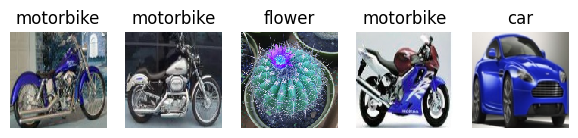

In [115]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(x_new):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(labels[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()